<a href="https://colab.research.google.com/github/Dinaputri111/Dataset/blob/main/Checkpoint3_2409116111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Indeks Pencemaran Udara di Provinsi DKI Jakarta Tahun 2021**

# Business Understanding

## 1. Business Objective
Menganalisis pola perubahan kualitas udara di Stasiun DKI Jakarta tahun 2021 untuk mengetahui tingkat pencemaran udara tertinggi dan terendah dari waktu ke waktu dan menentukan wilayah dengan tingkat pencemaran tertinggi sehingga dapat memprediksi kualitas udara di masa depan untuk membantu perencanaan kebijakan lingkungan yang lebih efektif.
## 2. Assess Situation
 aktivitas Transportasi, industri, dan domestik saat ini memiliki dampak signifikan bagi penurunan kualitas udara. Tingginya konsentrasi polutan seperti PM₂.₅ dan PM₁₀ telah melampaui ambang batas yang direkomendasikan oleh Organisasi Kesehatan Dunia (WHO), yang dapat berdampak negatif pada kesehatan masyarakat. Menganalisis Data kualitas udara yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) membantu dalam mengidentifikasi tingkat pencemaran udara di beberapa wilayah DKI Jakarta dan dapat menjadi perencanaan strategis dalam mitigasi polusi.

## 3. Data Mining Goals
Data Mining Goals dalam analisis ini adalah memahami pola standar kualitas udara harian di beberapa stasiun DKI Jakarta dengan menghitung rata-rata, median, nama stasiun yang paling banyak muncul di dataset, stasiun dengan pencemaran paling tinggi, dan korelasi antara berbagai polutan hingga visualisasi datanya.

## Project Plan

Untuk menganalisis dataset, langkah awal adalah menampilkan data yang telah tersedia. Kemudian dilakukan analisis pola pencemaran udara di Stasiun. Berikut terdapat beberapa tujuan utama yang ingin dicapai:

# Tampilan Data

In [170]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Fiks bgt.csv")

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI4 (Lubang Buaya),41.0,NaN,37.0,14.0,35.0,4.0,41,PM10,BAIK
1,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53,PM25,SEDANG
2,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47,O3,BAIK
3,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58,PM25,SEDANG
4,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48,PM25,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
770,2021-12-08,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,66.0,17.0,13.0,23.0,30.0,66,PM25,SEDANG
771,2021-12-09,DKI5 (Kebon Jeruk) Jakarta Barat,30.0,50.0,20.0,5.0,31.0,15.0,50,PM25,BAIK
772,2021-12-13,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,45.0,20.0,3.0,16.0,14.0,45,PM25,BAIK
773,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,75.0,25.0,15.0,23.0,44.0,75,PM25,SEDANG


# Tampilan 5 Baris pertama

In [171]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI4 (Lubang Buaya),41.0,NaN,37.0,14.0,35.0,4.0,41,PM10,BAIK
1,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53,PM25,SEDANG
2,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47,O3,BAIK
3,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58,PM25,SEDANG
4,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48,PM25,BAIK


# Info Data

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   775 non-null    object 
 1   stasiun   775 non-null    object 
 2   pm10      743 non-null    float64
 3   pm25      732 non-null    float64
 4   so2       753 non-null    float64
 5   co        762 non-null    float64
 6   o3        739 non-null    float64
 7   no2       760 non-null    float64
 8   max       775 non-null    object 
 9   critical  775 non-null    object 
 10  categori  774 non-null    object 
dtypes: float64(6), object(5)
memory usage: 66.7+ KB


# Menghitung Rata-rata Standar Kualitas Udara

In [173]:
df.mean(numeric_only=True)

,0
pm10,52.981157
pm25,82.870219
so2,35.442231
co,11.599738
o3,30.016238
no2,19.213158


# Menghitung Jumlah Nama Stasiun yang Paling Banyak Muncul dalam Dataset

In [174]:
kolom_tertentu = "stasiun"
if kolom_tertentu in df.columns:
    print(df[kolom_tertentu].value_counts())
else:
    print(f"\nKolom '{kolom_tertentu}' tidak ditemukan dalam dataset.")


stasiun
DKI4 (Lubang Buaya)                 230
DKI5 (Kebon Jeruk) Jakarta Barat    174
DKI2 (Kelapa Gading)                130
DKI1 (Bunderan HI)                  124
DKI3 (Jagakarsa)                    117
Name: count, dtype: int64


# Menghitung Median untuk mengetahui nilai tengah tingkat kualitas udara

In [175]:
df.median(numeric_only=True)

,0
pm10,56.0
pm25,86.0
so2,37.0
co,11.0
o3,28.0
no2,18.0


# Menghitung Korelasi antara berbagai polutan udara (PM₁₀, PM₂.₅, SO₂, CO, O₃, dan NO₂).
Partikulat kasar(PM10) dan partikulat halus (PM2.5) memiliki korelasi tinggi dan cenderung naik dan turun bersama, hal ini karena sumbernya sering kali sama seperti dari asap kendaraan, industri atau debu.

In [176]:
df.corr(numeric_only=True)

,pm10,pm25,so2,co,o3,no2
pm10,1.000000,0.853117,0.498182,0.408741,0.307034,0.500113
pm25,0.853117,1.000000,0.400782,0.375076,0.238479,0.483414
so2,0.498182,0.400782,1.000000,-0.001521,0.365545,0.097520
co,0.408741,0.375076,-0.001521,1.000000,0.038629,0.514404
o3,0.307034,0.238479,0.365545,0.038629,1.000000,0.002475
no2,0.500113,0.483414,0.097520,0.514404,0.002475,1.000000


# Menentukan Stasiun dengan Pencemaran Tertinggi

In [177]:
df.groupby("stasiun")[["pm25", "pm10", "co", "no2", "o3", "so2"]].mean().sort_values(by="pm25", ascending=False).head(5)

,pm25,pm10,co,no2,o3,so2
stasiun,,,,,,
DKI4 (Lubang Buaya),99.298246,57.909953,12.135135,19.475771,27.506849,39.629956
DKI5 (Kebon Jeruk) Jakarta Barat,81.589041,48.323171,11.287356,21.463855,24.856322,26.157233
DKI2 (Kelapa Gading),81.441667,57.562500,11.032000,19.905512,49.179688,45.685039
DKI3 (Jagakarsa),79.842105,57.551724,10.538462,15.482759,32.659574,38.594828
DKI1 (Bunderan HI),58.338710,41.750000,12.653226,18.500000,19.903226,26.241935


# DATA UNDERSTANDING

## Sumber Data

Dataset yang digunakan dalam analisis ini adalah "Indeks Standar Pencemar Udara DKI Jakarta" yang diperoleh dari kaggle. Dataset ini berisi informasi mengenai lokasi oengukuran kualitas udara, partikulat dan polutan pencemaran udara.

Sumber dataset: https://www.kaggle.com/datasets/yunaperdana/indeks-standar-pencemaran-udara-spku-dkijakarta

##  Struktur Data

Dataset ini memiliki 11 kolom dan 775 baris, dengan kolom utama antara lain:
*  tanggal : Tanggal pengukuran kualitas udara
* stasiun : Lokasi pengukuran di stasiun
*  pm10 : Partikulat salah satu parameter yang diukur

*  pm25 : Partikulat salah satu parameter yang diukur

* so2 : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur

*   co : Carbon Monoksida salah satu parameter yand diukur
*   o3 : Ozon salah satu parameter yang diukur
*  no2 : NItrogen dioksida salah satu parameter yang diukur
*   max : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama

* critical : Parameter yang hasil pengukurannya paling tinggi

*  categori : Kategori hasil perhitungan indeks standar pencemaran udara

# Informasi Data

In [178]:
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI4 (Lubang Buaya),41.0,NaN,37.0,14.0,35.0,4.0,41,PM10,BAIK
1,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53,PM25,SEDANG
2,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47,O3,BAIK
3,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58,PM25,SEDANG
4,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48,PM25,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
770,2021-12-08,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,66.0,17.0,13.0,23.0,30.0,66,PM25,SEDANG
771,2021-12-09,DKI5 (Kebon Jeruk) Jakarta Barat,30.0,50.0,20.0,5.0,31.0,15.0,50,PM25,BAIK
772,2021-12-13,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,45.0,20.0,3.0,16.0,14.0,45,PM25,BAIK
773,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,75.0,25.0,15.0,23.0,44.0,75,PM25,SEDANG


## Memeriksa Struktur Data

In [179]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (775, 11)


In [180]:
print("\nTipe data setiap kolom:\n", df.dtypes)


Tipe data setiap kolom:
 tanggal      object
stasiun      object
pm10        float64
pm25        float64
so2         float64
co          float64
o3          float64
no2         float64
max          object
critical     object
categori     object
dtype: object


In [181]:
print("\nStatistik deskriptif:\n", df.describe())


Statistik deskriptif:
              pm10        pm25         so2          co          o3         no2
count  743.000000  732.000000  753.000000  762.000000  739.000000  760.000000
mean    52.981157   82.870219   35.442231   11.599738   30.016238   19.213158
std     18.407624   30.237380   12.628580    5.101199   13.773222    8.981863
min     15.000000   20.000000    3.000000    2.000000    7.000000    4.000000
25%     37.000000   57.000000   26.000000    8.000000   20.000000   13.000000
50%     56.000000   86.000000   37.000000   11.000000   28.000000   18.000000
75%     66.000000  106.000000   43.000000   14.000000   36.000000   24.000000
max    179.000000  174.000000   82.000000   44.000000  151.000000   63.000000


In [182]:
df.corr(numeric_only=True)

,pm10,pm25,so2,co,o3,no2
pm10,1.000000,0.853117,0.498182,0.408741,0.307034,0.500113
pm25,0.853117,1.000000,0.400782,0.375076,0.238479,0.483414
so2,0.498182,0.400782,1.000000,-0.001521,0.365545,0.097520
co,0.408741,0.375076,-0.001521,1.000000,0.038629,0.514404
o3,0.307034,0.238479,0.365545,0.038629,1.000000,0.002475
no2,0.500113,0.483414,0.097520,0.514404,0.002475,1.000000


# MISSING VALUES

## Melihat Missing Values

In [183]:
print((df.isna().sum() / len(df)) *100)

tanggal     0.000000
stasiun     0.000000
pm10        4.129032
pm25        5.548387
so2         2.838710
co          1.677419
o3          4.645161
no2         1.935484
max         0.000000
critical    0.000000
categori    0.129032
dtype: float64


Terdapat value kosong pada kolom 'pm10', 'pm25', 's02', 'co', 'o3', 'no2', 'categori' sehingga kita melakukan pengecekan nilai kosong pada masing-masing kolom.

Pengecekan nilai kosong pada kolom 'pm10'

In [184]:
df[df['pm10'].isnull()]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
32,2021-01-16,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,NaN,18.0,12.0,37.0,8.0,37,CO,BAIK
33,2021-01-17,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,NaN,20.0,15.0,32.0,9.0,32,CO,BAIK
34,2021-01-18,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,NaN,22.0,8.0,31.0,4.0,31,CO,BAIK
123,2021-02-02,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,55.0,28.0,9.0,14.0,25.0,55,PM25,SEDANG
126,2021-02-05,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,48.0,28.0,8.0,14.0,35.0,48,PM25,BAIK
127,2021-02-06,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,34.0,21.0,4.0,24.0,6.0,34,PM25,BAIK
128,2021-02-07,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,29.0,22.0,5.0,20.0,7.0,29,PM25,BAIK
129,2021-02-08,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,41.0,23.0,6.0,17.0,11.0,41,PM25,BAIK
130,2021-02-09,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,57.0,31.0,9.0,15.0,21.0,57,PM25,SEDANG
170,2021-03-11,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,41.0,20.0,5.0,22.0,8.0,41,PM25,BAIK


Melakukan pengecekan nilai kosong pada kolom 'pm25'

In [185]:
df[df['pm25'].isnull()]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI4 (Lubang Buaya),41.0,NaN,37.0,14.0,35.0,4.0,41,PM10,BAIK
20,2021-01-04,DKI5 (Kebon Jeruk) Jakarta Barat,27.0,NaN,14.0,7.0,31.0,4.0,31,CO,BAIK
21,2021-01-05,DKI5 (Kebon Jeruk) Jakarta Barat,41.0,NaN,15.0,9.0,28.0,NaN,41,PM10,BAIK
22,2021-01-06,DKI5 (Kebon Jeruk) Jakarta Barat,33.0,NaN,12.0,19.0,46.0,NaN,46,CO,BAIK
23,2021-01-07,DKI5 (Kebon Jeruk) Jakarta Barat,27.0,NaN,13.0,11.0,36.0,NaN,36,CO,BAIK
24,2021-01-08,DKI5 (Kebon Jeruk) Jakarta Barat,36.0,NaN,18.0,19.0,28.0,NaN,36,PM10,BAIK
25,2021-01-09,DKI5 (Kebon Jeruk) Jakarta Barat,46.0,NaN,17.0,26.0,27.0,12.0,46,PM10,BAIK
26,2021-01-10,DKI5 (Kebon Jeruk) Jakarta Barat,19.0,NaN,20.0,8.0,34.0,5.0,34,CO,BAIK
27,2021-01-11,DKI5 (Kebon Jeruk) Jakarta Barat,33.0,NaN,21.0,10.0,34.0,9.0,34,CO,BAIK
28,2021-01-12,DKI5 (Kebon Jeruk) Jakarta Barat,25.0,NaN,22.0,6.0,38.0,6.0,38,CO,BAIK


Melakukan pengecekan nilai kosong pada kolom 'so2'

---



In [186]:
df[df['so2'].isnull()]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
309,2021-06-11,DKI4 (Lubang Buaya),64.0,99.0,NaN,9.0,35.0,26.0,99,PM25,SEDANG
542,2021-09-26,DKI2 (Kelapa Gading),56.0,74.0,NaN,7.0,54.0,6.0,74,PM25,SEDANG
543,2021-09-27,DKI2 (Kelapa Gading),53.0,77.0,NaN,11.0,47.0,17.0,77,PM25,SEDANG
544,2021-09-28,DKI2 (Kelapa Gading),49.0,71.0,NaN,8.0,49.0,13.0,71,PM25,SEDANG
590,2021-09-13,DKI5 (Kebon Jeruk) Jakarta Barat,51.0,70.0,NaN,6.0,20.0,10.0,70,PM25,SEDANG
591,2021-09-14,DKI5 (Kebon Jeruk) Jakarta Barat,26.0,37.0,NaN,3.0,17.0,8.0,37,PM25,BAIK
592,2021-09-15,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,79.0,NaN,14.0,22.0,26.0,79,PM25,SEDANG
608,2021-10-31,DKI3 (Jagakarsa),45.0,27.0,NaN,28.0,39.0,NaN,45,PM10,BAIK
635,2021-10-31,DKI4 (Lubang Buaya),NaN,79.0,NaN,NaN,NaN,NaN,79,PM25,SEDANG
636,2021-10-01,DKI5 (Kebon Jeruk) Jakarta Barat,55.0,84.0,NaN,8.0,34.0,12.0,84,PM25,SEDANG


Melakukan pengecekan nilai kosong pada kolom 'co'

In [187]:
df[df['co'].isnull()]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
78,2021-02-06,DKI2 (Kelapa Gading),30.0,38.0,37.0,NaN,57.0,9.0,57,O3,SEDANG
79,2021-02-07,DKI2 (Kelapa Gading),28.0,30.0,37.0,NaN,57.0,5.0,57,O3,SEDANG
80,2021-02-08,DKI2 (Kelapa Gading),26.0,31.0,37.0,NaN,54.0,12.0,54,O3,SEDANG
184,2021-04-19,DKI2 (Kelapa Gading),NaN,107.0,52.0,NaN,41.0,22.0,107,PM25,TIDAK SEHAT
185,2021-04-20,DKI2 (Kelapa Gading),64.0,94.0,52.0,NaN,55.0,18.0,94,PM25,SEDANG
227,2021-04-30,DKI4 (Lubang Buaya),57.0,85.0,36.0,NaN,26.0,17.0,85,PM25,SEDANG
275,2021-05-22,DKI4 (Lubang Buaya),53.0,85.0,32.0,NaN,36.0,22.0,85,PM25,SEDANG
304,2021-06-01,DKI4 (Lubang Buaya),65.0,105.0,41.0,NaN,36.0,30.0,105,PM25,TIDAK SEHAT
305,2021-06-02,DKI4 (Lubang Buaya),63.0,100.0,41.0,NaN,36.0,21.0,100,PM25,SEDANG
306,2021-06-08,DKI4 (Lubang Buaya),62.0,103.0,44.0,NaN,30.0,29.0,103,PM25,TIDAK SEHAT


Melakukan pengecekan nilai kosong pada kolom 'o3'

In [188]:
df[df['o3'].isnull()]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
93,2021-02-26,DKI2 (Kelapa Gading),45.0,54.0,43.0,13.0,NaN,19.0,54,PM25,SEDANG
192,2021-04-04,DKI3 (Jagakarsa),68.0,103.0,29.0,28.0,NaN,28.0,103,PM25,TIDAK SEHAT
193,2021-04-05,DKI3 (Jagakarsa),61.0,85.0,30.0,11.0,NaN,17.0,85,PM25,SEDANG
195,2021-04-07,DKI3 (Jagakarsa),25.0,35.0,27.0,3.0,NaN,4.0,35,PM25,BAIK
196,2021-04-08,DKI3 (Jagakarsa),31.0,52.0,28.0,5.0,NaN,7.0,52,PM25,SEDANG
197,2021-04-09,DKI3 (Jagakarsa),55.0,76.0,26.0,8.0,NaN,10.0,76,PM25,SEDANG
198,2021-04-10,DKI3 (Jagakarsa),64.0,101.0,25.0,16.0,NaN,18.0,101,PM25,TIDAK SEHAT
199,2021-04-11,DKI3 (Jagakarsa),62.0,89.0,25.0,14.0,NaN,21.0,89,PM25,SEDANG
200,2021-04-12,DKI3 (Jagakarsa),NaN,69.0,27.0,15.0,NaN,16.0,69,PM25,SEDANG
204,2021-04-30,DKI3 (Jagakarsa),54.0,23.0,12.0,10.0,NaN,18.0,54,PM10,SEDANG


Melakukan pengecekan nilai kosong pada kolom 'no2'

In [189]:
df[df['no2'].isnull()]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
21,2021-01-05,DKI5 (Kebon Jeruk) Jakarta Barat,41.0,NaN,15.0,9.0,28.0,NaN,41,PM10,BAIK
22,2021-01-06,DKI5 (Kebon Jeruk) Jakarta Barat,33.0,NaN,12.0,19.0,46.0,NaN,46,CO,BAIK
23,2021-01-07,DKI5 (Kebon Jeruk) Jakarta Barat,27.0,NaN,13.0,11.0,36.0,NaN,36,CO,BAIK
24,2021-01-08,DKI5 (Kebon Jeruk) Jakarta Barat,36.0,NaN,18.0,19.0,28.0,NaN,36,PM10,BAIK
36,2021-01-20,DKI5 (Kebon Jeruk) Jakarta Barat,30.0,NaN,15.0,7.0,33.0,NaN,33,CO,BAIK
40,2021-01-24,DKI5 (Kebon Jeruk) Jakarta Barat,27.0,NaN,14.0,9.0,29.0,NaN,29,CO,BAIK
43,2021-01-27,DKI5 (Kebon Jeruk) Jakarta Barat,15.0,NaN,16.0,5.0,20.0,NaN,20,CO,BAIK
44,2021-01-28,DKI5 (Kebon Jeruk) Jakarta Barat,28.0,NaN,19.0,11.0,28.0,NaN,28,PM10,BAIK
250,2021-05-14,DKI2 (Kelapa Gading),56.0,70.0,51.0,9.0,52.0,NaN,70,PM25,SEDANG
251,2021-05-15,DKI2 (Kelapa Gading),54.0,67.0,54.0,10.0,40.0,NaN,67,PM25,SEDANG


Melakukan pengecekan nilai kosong pada kolom 'categori'

In [190]:
df[df['categori'].isnull()]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
723,2021-12-03,DKI1 (Bunderan HI),49.0,31.0,9.0,19.0,7.0,49.0,PM25,BAIK,NaN


## Mengatasi Missing Values

In [191]:
df['pm10'] = df['pm10'].fillna(df['pm10'].dropna().mean())
df['pm25'] = df['pm25'].fillna(df['pm25'].dropna().mean())
df['so2'] = df['so2'].fillna(df['so2'].dropna().mean())
df['co'] = df['co'].fillna(df['co'].dropna().mean())
df['o3'] = df['o3'].fillna(df['o3'].dropna().mean())
df['no2'] = df['no2'].fillna(df['no2'].dropna().mean())

In [192]:
print(df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']].isnull().sum())

pm10    0
pm25    0
so2     0
co      0
o3      0
no2     0
dtype: int64


# DUPLICATED VALUES

In [193]:
df[df.duplicated()]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori


nilai dalam duplicated values tidak muncul yang artinya tidak ada nilai duplikat di dalam dataset.

# OUTLIERS

In [194]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
pm10,0.129032
pm25,0.000000
so2,0.516129
co,2.451613
o3,3.483871
no2,2.838710


In [195]:
columns_to_impute = ['pm10','pm25', 'so2', 'co', 'o3', 'no2']

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [196]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
pm10,0.0
pm25,0.0
so2,0.0
co,0.0
o3,0.0
no2,0.0


# INCONSISTENT VALUES

In [197]:
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI4 (Lubang Buaya),41.0,82.870219,37.0,14.0,35.0,4.0,41,PM10,BAIK
1,2021-01-01,DKI1 (Bunderan HI),38.0,53.000000,29.0,6.0,31.0,13.0,53,PM25,SEDANG
2,2021-01-02,DKI1 (Bunderan HI),27.0,46.000000,27.0,7.0,47.0,7.0,47,O3,BAIK
3,2021-01-03,DKI1 (Bunderan HI),44.0,58.000000,25.0,7.0,40.0,13.0,58,PM25,SEDANG
4,2021-01-04,DKI1 (Bunderan HI),30.0,48.000000,24.0,4.0,32.0,7.0,48,PM25,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
770,2021-12-08,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,66.000000,17.0,13.0,23.0,30.0,66,PM25,SEDANG
771,2021-12-09,DKI5 (Kebon Jeruk) Jakarta Barat,30.0,50.000000,20.0,5.0,31.0,15.0,50,PM25,BAIK
772,2021-12-13,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,45.000000,20.0,3.0,16.0,14.0,45,PM25,BAIK
773,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,75.000000,25.0,15.0,23.0,40.5,75,PM25,SEDANG


In [198]:
inconsistent_values = df[df['pm10'] < 0]
print(f'Jumlah nilai tidak konsisten: {len(inconsistent_values)}')

Jumlah nilai tidak konsisten: 0


# CONSTRUCT DATA

Menambahkan kolom baru di dalam dataset. Membuat 3 kolom baru dalam dataset antara lain:


*   kategorikan_kualitas_udara
*   rata_rata_kualitas_udara
*   nama hari


In [199]:
def kategorikan_kualitas_udara(pm10):
    if pm10 <= 50:
        return 'Baik'
    elif pm10 <= 100:
        return 'Sedang'
    elif pm10 <= 150:
        return 'Tidak Sehat untuk Kelompok Sensitif'
    elif pm10 <= 200:
        return 'Tidak Sehat'
    else:
        return 'Sangat Tidak Sehat'

df['kategori_kualitas_udara'] = df['pm10'].apply(kategorikan_kualitas_udara)

In [200]:
df['rata_rata_kualitas_udara'] = df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']].mean(axis=1)

In [201]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df['hari'] = df['tanggal'].dt.day_name()

In [202]:
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,kategori_kualitas_udara,rata_rata_kualitas_udara,hari
0,2021-01-01,DKI4 (Lubang Buaya),41.0,82.870219,37.0,14.0,35.0,4.0,41,PM10,BAIK,Baik,35.645036,Friday
1,2021-01-01,DKI1 (Bunderan HI),38.0,53.000000,29.0,6.0,31.0,13.0,53,PM25,SEDANG,Baik,28.333333,Friday
2,2021-01-02,DKI1 (Bunderan HI),27.0,46.000000,27.0,7.0,47.0,7.0,47,O3,BAIK,Baik,26.833333,Saturday
3,2021-01-03,DKI1 (Bunderan HI),44.0,58.000000,25.0,7.0,40.0,13.0,58,PM25,SEDANG,Baik,31.166667,Sunday
4,2021-01-04,DKI1 (Bunderan HI),30.0,48.000000,24.0,4.0,32.0,7.0,48,PM25,BAIK,Baik,24.166667,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,2021-12-08,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,66.000000,17.0,13.0,23.0,30.0,66,PM25,SEDANG,Baik,32.166667,Wednesday
771,2021-12-09,DKI5 (Kebon Jeruk) Jakarta Barat,30.0,50.000000,20.0,5.0,31.0,15.0,50,PM25,BAIK,Baik,25.166667,Thursday
772,2021-12-13,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,45.000000,20.0,3.0,16.0,14.0,45,PM25,BAIK,Baik,20.000000,Monday
773,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,75.000000,25.0,15.0,23.0,40.5,75,PM25,SEDANG,Sedang,38.583333,Thursday


# Data Reduction

Menghapus kolom yang tidak relevan dengan dataset.

In [203]:
df = df.drop(["kategori_kualitas_udara", "rata_rata_kualitas_udara"], axis=1)

In [204]:
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,hari
0,2021-01-01,DKI4 (Lubang Buaya),41.0,82.870219,37.0,14.0,35.0,4.0,41,PM10,BAIK,Friday
1,2021-01-01,DKI1 (Bunderan HI),38.0,53.000000,29.0,6.0,31.0,13.0,53,PM25,SEDANG,Friday
2,2021-01-02,DKI1 (Bunderan HI),27.0,46.000000,27.0,7.0,47.0,7.0,47,O3,BAIK,Saturday
3,2021-01-03,DKI1 (Bunderan HI),44.0,58.000000,25.0,7.0,40.0,13.0,58,PM25,SEDANG,Sunday
4,2021-01-04,DKI1 (Bunderan HI),30.0,48.000000,24.0,4.0,32.0,7.0,48,PM25,BAIK,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
770,2021-12-08,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,66.000000,17.0,13.0,23.0,30.0,66,PM25,SEDANG,Wednesday
771,2021-12-09,DKI5 (Kebon Jeruk) Jakarta Barat,30.0,50.000000,20.0,5.0,31.0,15.0,50,PM25,BAIK,Thursday
772,2021-12-13,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,45.000000,20.0,3.0,16.0,14.0,45,PM25,BAIK,Monday
773,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,75.000000,25.0,15.0,23.0,40.5,75,PM25,SEDANG,Thursday


# Visualisasi Data

## Bar Chart

Diagram batang rata-rata polutan pada setiap Stasiun

In [205]:
import matplotlib.pyplot as plt

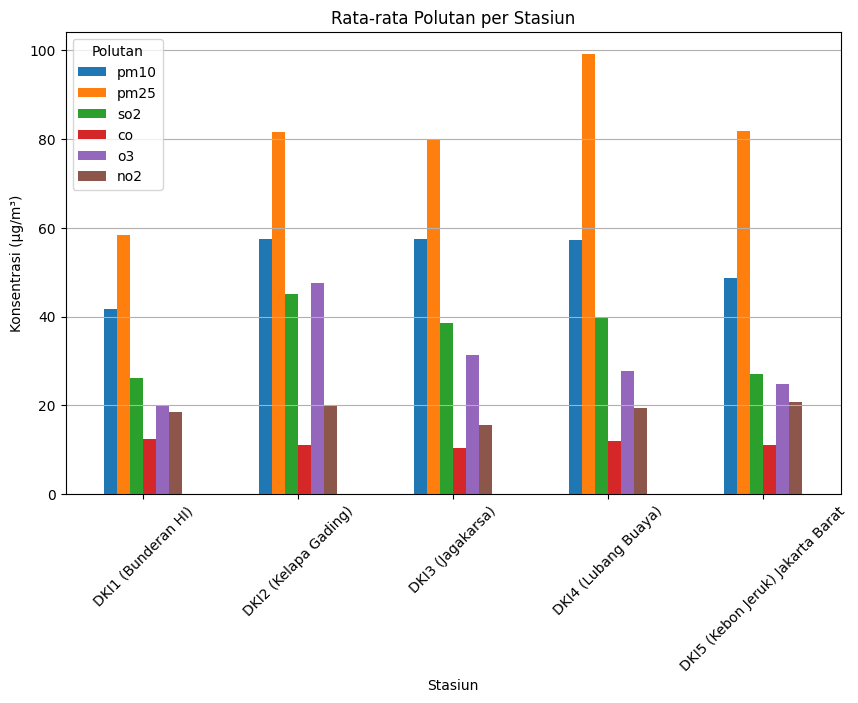

In [206]:
pollutants = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']
avg_pollutants = df.groupby('stasiun')[pollutants].mean()
avg_pollutants.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Polutan per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Polutan')
plt.grid(axis='y')
plt.show()

## Pie Chart

Diagram Lingkaran untuk mengetahui distribusi kualitas udara di Stasiun Lubang Buaya.

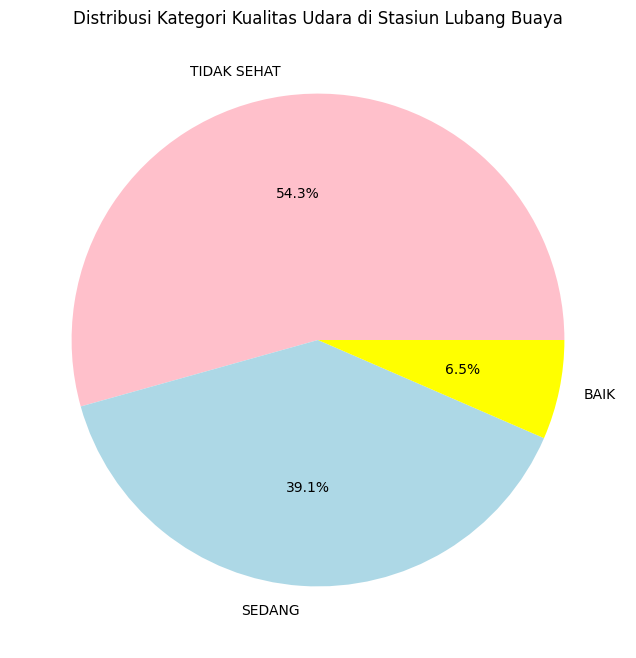

In [207]:
df_pie = df[df['stasiun'] == 'DKI4 (Lubang Buaya)']
plt.figure(figsize=(10, 8))
plt.pie(df_pie['categori'].value_counts(), labels=df_pie['categori'].value_counts().index, autopct='%1.1f%%', colors=['pink', 'lightblue', 'yellow'])
plt.title('Distribusi Kategori Kualitas Udara di Stasiun Lubang Buaya')
plt.show()

## Line Chart

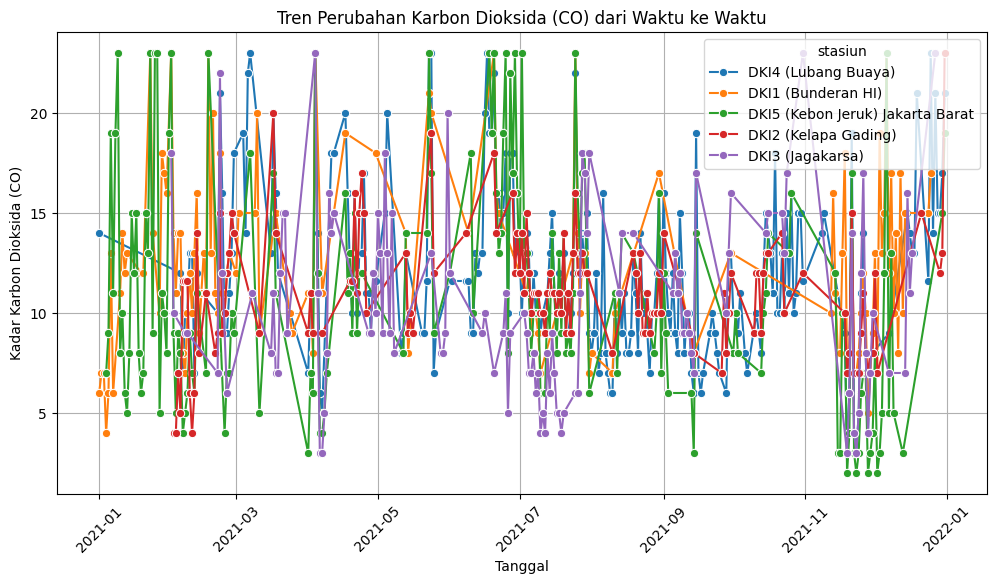

In [208]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="tanggal", y="co", hue="stasiun", marker="o")

plt.xlabel("Tanggal")
plt.ylabel("Kadar Karbon Dioksida (CO)")
plt.title("Tren Perubahan Karbon Dioksida (CO) dari Waktu ke Waktu")
plt.xticks(rotation=45)
plt.legend(title="stasiun")
plt.grid(True)
plt.show()

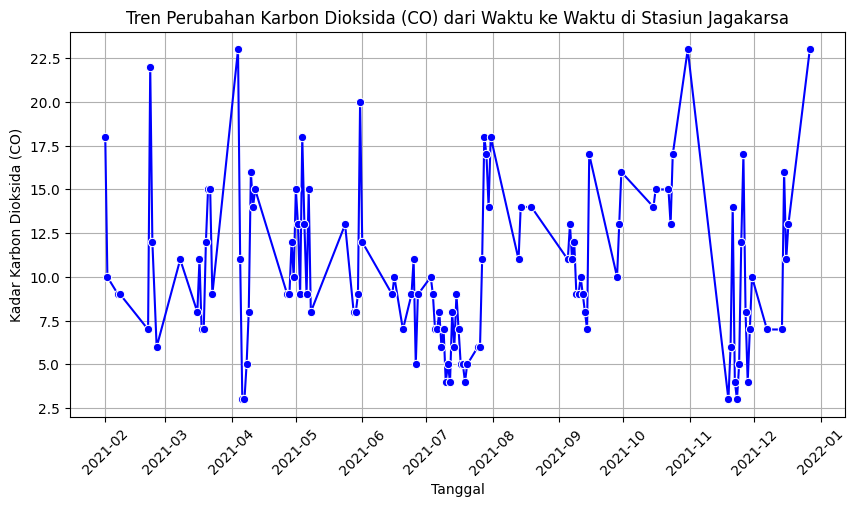

In [209]:
stasiun = "DKI3 (Jagakarsa)"
df_line = df[df["stasiun"] == 'DKI3 (Jagakarsa)']
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_line, x="tanggal", y="co", marker="o", color="blue")

plt.xlabel("Tanggal")
plt.ylabel("Kadar Karbon Dioksida (CO)")
plt.title("Tren Perubahan Karbon Dioksida (CO) dari Waktu ke Waktu di Stasiun Jagakarsa")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# INSIGHT DAN TINDAKAN

Berdasarkan dataset yang telah dianalisis dan digambarkan dalam bentuk diagram terdapat insight diantaranya:


1.   Pada Bar Chart menunjukkan setiap stasiun memiliki tingkat polutan yang berbeda-beda, hal ini menunjukkan bahwa pencemaran udara bervariasi berdasarkan lokasi. PM25 dan PM10 menempati angka tertinggi di setiap stasiun yang berasal dari sumber asap kendaraan, industri, dll. Apabila polutan ini terus meningkat maka akan berdampak pada kesehatan sehingga tindakan yang dapat diupayakan adalah meningkatkan kesadaran masyarakat untuk menggunakan masker dan mengurangi aktivitas luar ruangan di area dengan tingkat PM2.5 dan PM10 tinggi dan pengurangan emisi kendaraan dengan car free day.
2.   Pada Pie Chart menampilkan Stasiun dengan PM25 dan PM10 tertinggi untuk mengetahui distribusi kualitas udaranya yang sebagian besar kategori adalah kualitas udara yang tidak sehat, menandakan masalah pencemaran udara yang serius di Stasiun Lubang Buaya. Sehingga tindakan yang dapat diupayakan adalah pemerintah setempat dapat menerapkan penghijauan seperti taman kota atau penanaman pohon.
3.  Pada Line Chart yang pertama menampilkan tren perubahan Karbon dioksida (CO) di seluruh Stasiun dari waktu ke waktu yang masing-masing memiliki kadar yang cukup tinggi perharinya. Dan pada Line Chart kedua mengambil salah satu Stasiun yaitu Stasiun Jagakarsa untuk menampilkan tren perubahan Karbon dioksidanya dari waktu ke waktu. Dari Grafik tersebut jika grafiknya meningkat ini bisa disebabkan oleh meningkatnya aktivitas kendaraan atau industri di sekitar Jagakarsa. Sehingga tindakan yang dapat diupayakan adalah penggunaan transportasi umum agar mengurangi kadar polutan dan program penghijauan untuk menyerap polutan udara.



